In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
address = 'Hong Kong, HK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [3]:
df=pd.read_excel('Estate-price.xlsx', index_col=0).reset_index()
df.head()

,Estate,Quantity,Avg price / sq ft (Saleable),Avg price / sq ft (Gross),Price change - Saleable Area,dis(km),Latitude,Longitude
0,City One Shatin,56,17082,13353,0.012,12.57,22.387974,114.204203
1,Discovery Bay,51,12229,10323,0.009,16.18,22.284116,114.016245
2,Mei Foo Sun Chuen,48,13923,10485,0.024,6.87,22.340455,114.140623
3,Taikoo Shing,42,20609,18023,0.052,5.92,22.286190,114.218147
4,Laguna City,31,14829,11880,0.062,7.60,22.306050,114.226710


In [4]:
df=df.sort_values(by='Avg price / sq ft (Saleable)')
df.head()

,Estate,Quantity,Avg price / sq ft (Saleable),Avg price / sq ft (Gross),Price change - Saleable Area,dis(km),Latitude,Longitude
1,Discovery Bay,51,12229,10323,0.009,16.18,22.284116,114.016245
7,Belvedere Garden,25,12741,10710,0.071,11.79,22.371577,114.099922
17,Park Island,20,12876,9877,0.062,12.74,22.309540,114.173700
8,The Reach,25,13209,9702,0.045,21.78,22.438541,114.032234
15,Bellagio,21,13312,10083,0.019,13.79,22.282150,114.156890


In [5]:
CLIENT_ID = 'UXOM532X21KLBWDFHYJ1YQ0ZYGNUVFNXJU4ALI2CF1HL2F1S' # your Foursquare ID
CLIENT_SECRET = '45CD0GEW35WLWTK44N0FAG4OMH3NXTU4ITKOT2KKRE32PJ3C' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UXOM532X21KLBWDFHYJ1YQ0ZYGNUVFNXJU4ALI2CF1HL2F1S
CLIENT_SECRET:45CD0GEW35WLWTK44N0FAG4OMH3NXTU4ITKOT2KKRE32PJ3C


In [6]:
map_marina = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for Latitude, Longitude, Estate in zip(df['Latitude'], df['Longitude'], df['Estate']):
  label = '{}'.format(Estate)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [Latitude, Longitude],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_marina) 
    
map_marina

In [7]:
Estate = pd.DataFrame(columns=['Estate','Restaurant','Supermarket','School'])
Estate['Estate'] = ['Belvedere Garden','Park Island','Bellagio','Richland Gardens','Mei Foo Sun Chuen']

Show the location of all Estate

In [8]:
address = 'Belvedere Garden, HK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

22.2194338 114.204135683503


In [9]:
search_query = 'Restaurant'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UXOM532X21KLBWDFHYJ1YQ0ZYGNUVFNXJU4ALI2CF1HL2F1S&client_secret=45CD0GEW35WLWTK44N0FAG4OMH3NXTU4ITKOT2KKRE32PJ3C&ll=22.2194338,114.204135683503&v=20180604&query=Restaurant&radius=1000&limit=30'

In [10]:
results = requests.get(url).json()
# results

In [11]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '52af3b593cf9994f4e043c00', 'name': 'S...",False,4f7ff145e4b0ef2097a67190,"Shop 101, 1/F, Stanley Plaza, 23 Carmel Rd",HK,Chek Chue,香港,588,"[Shop 101, 1/F, Stanley Plaza, 23 Carmel Rd, S...","[{'label': 'display', 'lat': 22.21922831555542...",22.219228,114.209842,Southern,Xia Fei Shanghainese Restaurant (霞飛點心拉麵),v-1561476470
1,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,4bb5ab5f1344b7130c889c04,"UG/F, 52-56 Stanley Main St",HK,NaN,香港,874,"[UG/F, 52-56 Stanley Main St, 香港]","[{'label': 'display', 'lat': 22.21814748959589...",22.218147,114.212507,NaN,Stanley Restaurant (赤柱餐廳),v-1561476470
2,"[{'id': '58daa1558bbb0b01f18ec1d3', 'name': 'C...",False,4de8789888774aa92ca05d43,"G/F, Yau Yee House, 40-42 Stanley Main St",HK,Chek Chue,香港,918,"[G/F, Yau Yee House, 40-42 Stanley Main St, So...","[{'label': 'display', 'lat': 22.21804177035406...",22.218042,114.212919,Southern,New Star Restaurant 新星茶餐廳,v-1561476470
3,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,501e240ce4b0bbacb69d5d54,Shek O,HK,香港,香港,565,"[Shek O, 香港]","[{'label': 'display', 'lat': 22.218282, 'lng':...",22.218282,114.209479,NaN,Shek O Seafood Restaurant,v-1561476470
4,"[{'id': '52af3a7c3cf9994f4e043bed', 'name': 'C...",False,53ed8551498e153e4b56d834,"Shop U3, 1/F, Chik Tak Mansion, 11 Stanley New St",HK,Chek Chue,香港,725,"[Shop U3, 1/F, Chik Tak Mansion, 11 Stanley Ne...","[{'label': 'display', 'lat': 22.22083517557925...",22.220835,114.211009,Southern,Lok Hin Restaurant 樂軒廚坊,v-1561476470


In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

In [13]:
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
dataframe = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe['categories'] = dataframe.apply(get_category_type, axis=1)

# clean columns

dataframe.columns = [col.split(".")[-1] for col in dataframe.columns]
dataframe.insert(0, 'neighborhood', 'Discovery Bay')

#print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))
dataframe.head()

,neighborhood,name,categories,lat,lng
0,Discovery Bay,Xia Fei Shanghainese Restaurant (霞飛點心拉麵),Shanghai Restaurant,22.219228,114.209842
1,Discovery Bay,Stanley Restaurant (赤柱餐廳),Asian Restaurant,22.218147,114.212507
2,Discovery Bay,New Star Restaurant 新星茶餐廳,Cha Chaan Teng,22.218042,114.212919
3,Discovery Bay,Shek O Seafood Restaurant,Asian Restaurant,22.218282,114.209479
4,Discovery Bay,Lok Hin Restaurant 樂軒廚坊,Cantonese Restaurant,22.220835,114.211009


In [14]:
dataframe['categories'].count()

9

Put data into dataframe Estate

In [15]:
Estate.loc[0,'Restaurant'] = dataframe['categories'].count()
Estate

,Estate,Restaurant,Supermarket,School
0,Belvedere Garden,9,NaN,NaN
1,Park Island,NaN,NaN,NaN
2,Bellagio,NaN,NaN,NaN
3,Richland Gardens,NaN,NaN,NaN
4,Mei Foo Sun Chuen,NaN,NaN,NaN


In [16]:
address = 'Belvedere Garden, HK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

search_query = 'Supermarket, market'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",False,4b52e25cf964a520eb8927e3,Stanley Market Rd,HK,香港,香港,869,"[Stanley Market Rd, 香港]","[{'label': 'display', 'lat': 22.21890017465704...",22.218900,114.212555,NaN,Stanley Market (赤柱市集),v-1561476471
1,"[{'id': '4bf58dd8d48988d162941735', 'name': 'O...",False,5854f87852a0510ab8860c29,NaN,HK,NaN,香港,617,[香港],"[{'label': 'display', 'lat': 22.21868, 'lng': ...",22.218680,114.210070,NaN,Christmas Market 聖誕市集,v-1561476471
2,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4ca5727b97c8a1cd954867a5,"Shop C2, G/F, 74 Stanley Main St",HK,Chek Chue,香港,849,"[Shop C2, G/F, 74 Stanley Main St, Southern, 香港]","[{'label': 'display', 'lat': 22.21902810361399...",22.219028,114.212368,Southern,Häagen-Dazs 哈根達斯,v-1561476471
3,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",False,4e0967c6e4cdefcff6e87a92,"1 Stanley Market Rd, Stanley",HK,Chek Chue,香港,848,"[1 Stanley Market Rd, Stanley, Southern, 香港]","[{'label': 'display', 'lat': 22.21887790909356...",22.218878,114.212351,Southern,Man Yick Noodle Specialist (民益麵家),v-1561476471


In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
dataframe = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe['categories'] = dataframe.apply(get_category_type, axis=1)

# clean columns

dataframe.columns = [col.split(".")[-1] for col in dataframe.columns]
dataframe.insert(0, 'neighborhood', 'Discovery Bay')

#print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))
dataframe.head()

,neighborhood,name,categories,lat,lng
0,Discovery Bay,Stanley Market (赤柱市集),Market,22.218900,114.212555
1,Discovery Bay,Christmas Market 聖誕市集,Other Great Outdoors,22.218680,114.210070
2,Discovery Bay,Häagen-Dazs 哈根達斯,Ice Cream Shop,22.219028,114.212368
3,Discovery Bay,Man Yick Noodle Specialist (民益麵家),Noodle House,22.218878,114.212351


In [18]:
Estate.loc[0,'Supermarket'] = dataframe['categories'].count()
Estate

,Estate,Restaurant,Supermarket,School
0,Belvedere Garden,9,4,NaN
1,Park Island,NaN,NaN,NaN
2,Bellagio,NaN,NaN,NaN
3,Richland Gardens,NaN,NaN,NaN
4,Mei Foo Sun Chuen,NaN,NaN,NaN


Get numbers of school in neighborhood

In [19]:
address = 'Belvedere Garden, HK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
search_query = 'School'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

22.2194338 114.204135683503


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,5c42879f2bf29b002d3558fb,NaN,HK,香港,香港,511,[香港],"[{'label': 'display', 'lat': 22.219348, 'lng':...",22.219348,114.209095,NaN,The International Montessori School,v-1561476471
1,"[{'id': '4bf58dd8d48988d1ad941735', 'name': 'T...",False,4e39277e18380f8ec54cb90e,13-15 Tung Tau Wan Rd,HK,Chek Chue,香港,1117,"[13-15 Tung Tau Wan Rd, Southern, 香港]","[{'label': 'display', 'lat': 22.21851605880094...",22.218516,114.214934,Southern,Hong Kong Sea School 香港航海學校,v-1561476471


In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
dataframe = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe['categories'] = dataframe.apply(get_category_type, axis=1)

# clean columns

dataframe.columns = [col.split(".")[-1] for col in dataframe.columns]
dataframe.insert(0, 'neighborhood', 'Discovery Bay')

#print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))
dataframe.head()

,neighborhood,name,categories,lat,lng
0,Discovery Bay,The International Montessori School,School,22.219348,114.209095
1,Discovery Bay,Hong Kong Sea School 香港航海學校,Trade School,22.218516,114.214934


In [21]:
Estate.loc[0,'School'] = dataframe['categories'].count()
Estate

,Estate,Restaurant,Supermarket,School
0,Belvedere Garden,9,4,2
1,Park Island,NaN,NaN,NaN
2,Bellagio,NaN,NaN,NaN
3,Richland Gardens,NaN,NaN,NaN
4,Mei Foo Sun Chuen,NaN,NaN,NaN


Run the same for Park Island

In [22]:
address = 'Park Island, NT, HK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
search_query = 'Restaurant'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,53282e8d498e268d5b587034,"G/F, 46 Pak Lam Rd",HK,Ma Wan,香港,128,"[G/F, 46 Pak Lam Rd, New Territories, 香港]","[{'label': 'display', 'lat': 22.3520922, 'lng'...",22.352092,114.059938,New Territories,Golden Horse Restaurant 金馬餐廳,v-1561476474,NaN
1,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",False,4dc9203b45dd9aa940b64898,"G/F, Tin Liu New Village",HK,馬灣市,香港,129,"[G/F, Tin Liu New Village, 香港]","[{'label': 'display', 'lat': 22.35183855053779...",22.351839,114.060017,NaN,Japanese Restaurant EBISU (居酒屋 恵比寿),v-1561476474,NaN
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5158f4eee4b0702ace38fff5,"G/F, 349-351 Ma Wan Main St",HK,馬灣市,香港,146,"[G/F, 349-351 Ma Wan Main St, 香港]","[{'label': 'display', 'lat': 22.35310455351620...",22.353105,114.060040,NaN,Honey Heart Seafood Restaurant (心意海鮮酒家),v-1561476474,NaN
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4be69aa8cf200f47f0b3143c,馬灣大街村中211及214號地下,HK,馬灣市,香港,282,"[馬灣大街村中211及214號地下, 香港]","[{'label': 'display', 'lat': 22.35194119034460...",22.351941,114.058449,NaN,Fai Kee Seafood Restaurant 輝記海鮮飯店,v-1561476474,NaN
4,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",False,4bf66b859abec9b6e8b725e8,"Shop 1-3, 1/F, Beach Commercial Complex, Park ...",HK,馬灣市,香港,279,"[Shop 1-3, 1/F, Beach Commercial Complex, Park...","[{'label': 'display', 'lat': 22.34981638001167...",22.349816,114.061506,NaN,Pattaya Island Thai Restaurant 芭堤雅小島泰式餐廳,v-1561476474,NaN


In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
dataframe = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe['categories'] = dataframe.apply(get_category_type, axis=1)

# clean columns

dataframe.columns = [col.split(".")[-1] for col in dataframe.columns]
dataframe.insert(0, 'neighborhood', 'Discovery Bay')

#print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))
dataframe.head

<bound method NDFrame.head of     neighborhood                                      name  \
0  Discovery Bay              Golden Horse Restaurant 金馬餐廳   
1  Discovery Bay       Japanese Restaurant EBISU (居酒屋 恵比寿)   
2  Discovery Bay   Honey Heart Seafood Restaurant (心意海鮮酒家)   
3  Discovery Bay         Fai Kee Seafood Restaurant 輝記海鮮飯店   
4  Discovery Bay  Pattaya Island Thai Restaurant 芭堤雅小島泰式餐廳   
5  Discovery Bay                    Harvest Restaurant 豐盛閣   
6  Discovery Bay              P. I. Flavor Restaurant 和風餐廳   
7  Discovery Bay                                 Cafe Roma   
8  Discovery Bay    Wonderland Tea House Limited (桃園閣有限公司)   
9  Discovery Bay      Chicken Pot & Seafood Dishes 鷄煲王海鮮小炒   

            categories        lat         lng  
0   Chinese Restaurant  22.352092  114.059938  
1  Japanese Restaurant  22.351839  114.060017  
2   Chinese Restaurant  22.353105  114.060040  
3   Chinese Restaurant  22.351941  114.058449  
4      Thai Restaurant  22.349816  114.061506  

In [24]:
Estate.loc[1,'Restaurant'] = dataframe['categories'].count()
Estate

,Estate,Restaurant,Supermarket,School
0,Belvedere Garden,9,4,2
1,Park Island,10,NaN,NaN
2,Bellagio,NaN,NaN,NaN
3,Richland Gardens,NaN,NaN,NaN
4,Mei Foo Sun Chuen,NaN,NaN,NaN


For convinient, let's ust a function to get the data from foursquare:

In [25]:
def get_estate_data(location, cat):
    address = location+', HK'

    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = cat
    radius = 1000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe.head()


    filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
    dataframe = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe['categories'] = dataframe.apply(get_category_type, axis=1)

    # clean columns

    dataframe.columns = [col.split(".")[-1] for col in dataframe.columns]
    dataframe.insert(0, 'neighborhood', 'Discovery Bay')

    #print('{} venues were returned by Foursquare.'.format(dataframe.shape[0]))
    dataframe.head()
    return dataframe['categories'].count()

In [26]:
Estate.loc[1,'Supermarket'] = get_estate_data('Park Island', 'Supermarket, market')
Estate.loc[1,'School'] = get_estate_data('Park Island', 'School')
Estate.loc[2,'Restaurant'] = get_estate_data('Bellagio', 'Restaurant')
Estate.loc[2,'Supermarket'] = get_estate_data('Bellagio', 'Supermarket, market')
Estate.loc[2,'School'] = get_estate_data('Bellagio', 'School')
Estate.loc[3,'Restaurant'] = get_estate_data('Richland Gardens', 'Restaurant')
Estate.loc[3,'Supermarket'] = get_estate_data('Richland Gardens', 'Supermarket, market')
Estate.loc[3,'School'] = get_estate_data('Richland Gardens', 'School')
Estate.loc[4,'Restaurant'] = get_estate_data('Mei Foo Sun Chuen', 'Restaurant')
Estate.loc[4,'Supermarket'] = get_estate_data('Mei Foo Sun Chuen', 'Supermarket, market')
Estate.loc[4,'School'] = get_estate_data('Mei Foo Sun Chuen', 'School')
Estate

,Estate,Restaurant,Supermarket,School
0,Belvedere Garden,9,4,2
1,Park Island,10,1,2
2,Bellagio,5,2,2
3,Richland Gardens,30,7,12
4,Mei Foo Sun Chuen,24,6,12


In [122]:
df1 = Estate
df1=df1.set_index('Estate')
df1

,Restaurant,Supermarket,School
Estate,,,
Belvedere Garden,9,4,2
Park Island,10,1,2
Bellagio,5,2,2
Richland Gardens,30,7,12
Mei Foo Sun Chuen,24,6,12


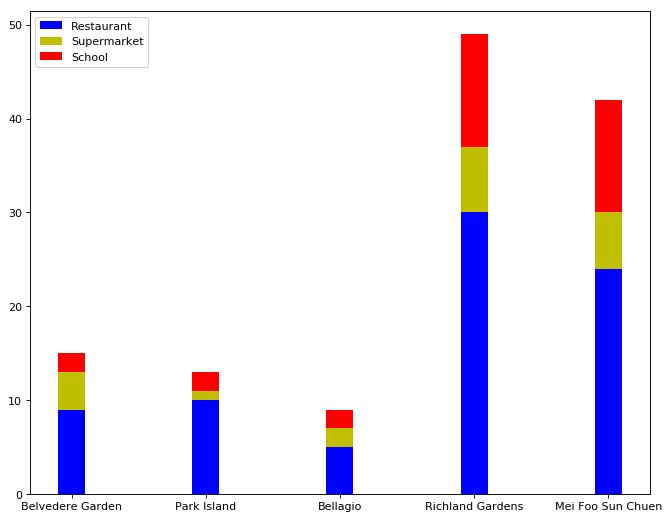

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8), dpi= 80)

plt.bar(x=df1.index,height=df1['Restaurant'], width=0.2, color='b', align='center')
plt.bar(x=df1.index,height=df1['Supermarket'], width=0.2, color='y', align='center',bottom=df1['Restaurant'])
plt.bar(x=df1.index,height=df1['School'], width=0.2, color='r', align='center',bottom=(df1['Supermarket']+df1['Restaurant']))
plt.legend(df1,loc=2)
plt.show()